<a href="https://colab.research.google.com/github/Damiao97/assignment4_pml/blob/main/Iris_Confusion_Matrix_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron da aula

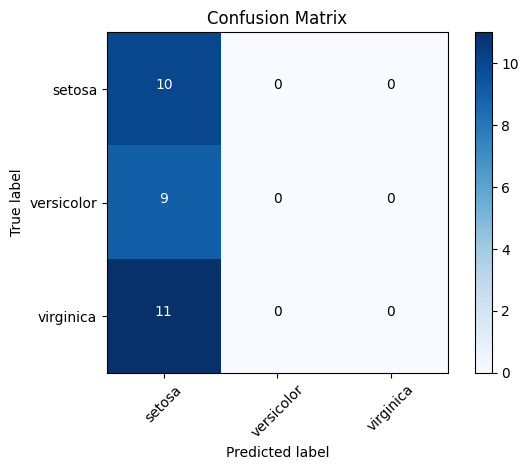

              precision    recall  f1-score   support

      setosa       0.33      1.00      0.50        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

class Perceptron():
    def __init__(self, eta=0.1, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def step_fit(self, X, y):
        for xi, label in zip(X, y):
            update = self.eta * (label - self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.argmax(np.dot(X, self.w_[1:]) + self.w_[0])

    def fit(self, X, y):
        self.weights = [random.uniform(-1.0, 1.0) for _ in range(1 + X.shape[1])]
        for _ in range(self.n_iter):
            self.w_ = self.weights.copy()
            for label in np.unique(y):
                self.step_fit(X[y == label], [1 if yi == label else -1 for yi in y])
        return self

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the custom Perceptron model
perceptron = Perceptron(eta=0.1, n_iter=150)
perceptron.fit(X_train, y_train)

# Predictions on the validation set
y_pred = np.array([perceptron.predict(x) for x in X_val])

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Define class labels
classes = iris.target_names

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Fill in confusion matrix with values
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.show()

# Compute confusion matrix
report = classification_report(y_val, y_pred, target_names=classes)
print(report)


# Perceptron importado

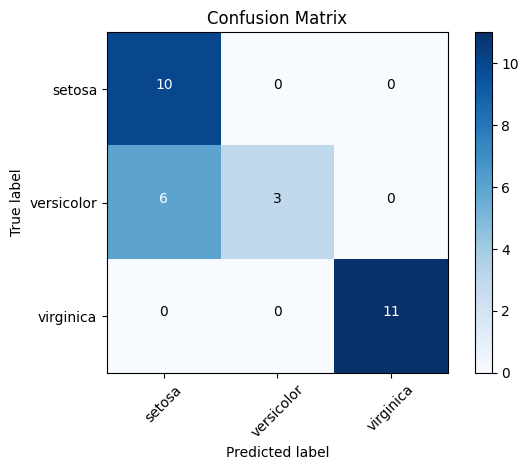

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.33      0.50         9
           2       1.00      1.00      1.00        11

    accuracy                           0.80        30
   macro avg       0.88      0.78      0.76        30
weighted avg       0.88      0.80      0.77        30



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Predictions on the validation set
y_pred = perceptron.predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Define class labels
classes = iris.target_names

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Fill in confusion matrix with values
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.show()

# Compute confusion matrix
report = classification_report(y_val, y_pred)
print(report)